# MLABvo - Get snapshots

This notebook shows how to get snapshots by station and date

``sudo pip install MLABvo``

In [1]:
from IPython.core.display import HTML
from MLABvo.Bolidozor import Bolidozor
import json
import datetime

# Get active stations
Every station has rating in RTbolidozor. This number shud reflect quality of measured data. ```getStation``` function wihout any aditional parameters return only active stations (with rating bellow 10). 

In [2]:
bz = Bolidozor()
stations = bz.getStation()
print("Count of active stations:", len(stations.result),'\n')
#print(json.dumps(stations.result, sort_keys=True, indent=4))

print ('station_id station_name')
for station in stations.result:
    print(station['id'], station['namesimple'])

Count of active stations: 8 

station_id station_name
23 ZVPP-R6
25 OBSUPICE-R6
26 CIIRC-R1
27 DDMTREBIC-R3
29 SVAKOV-R12
30 VALMEZ-R1
31 NACHODSKO-R5
32 HFN-R1


# Get station by name or id

In [4]:
bz = Bolidozor()
stations = bz.getStation(27)
print(json.dumps(stations.result, sort_keys=True, indent=4))

[
    {
        "comment": "2017-08-15 11:28:22",
        "hardware": "New station - automatically created",
        "id": 27,
        "name": "DDMTREBIC-R3",
        "namesimple": "DDMTREBIC-R3",
        "obs_alt": 483.0,
        "obs_comment": "",
        "obs_lat": 49.2071,
        "obs_lon": 15.8759,
        "obs_name": "T\u0159eb\u00ed\u010d",
        "obs_namesimple": "ddmtrebic",
        "obs_www": "https://www.facebook.com/HvezdarnaTrebic",
        "observatory": 11,
        "observatory_url": "http://api.vo.astro.cz/bolidozor/getObservatory/?id=11",
        "owner": 0,
        "owner_url": "http://api.vo.astro.cz/bolidozor/getUser/?id=11",
        "status": 1,
        "web": "0"
    }
]


In [5]:
bz = Bolidozor()
stations = bz.getStation('OBSUPICE-R6')
print(json.dumps(stations.result, sort_keys=True, indent=4))

[]


# Get all stations

In [58]:
bz = Bolidozor(debug = True)
stations = bz.getStation(all=True).result
print("Count of all stations is", len(stations))
#print(json.dumps(stations, sort_keys=True, indent=4))

http://api.vo.astro.cz/bolidozor/getStation/ {'all': True}
getResult 25f8ae1f-2b06-4459-a1e9-0dc14c3d45e2 True 0.25
Count of all stations is 24


## Set one station as default


In [59]:
bz = Bolidozor(debug = False)
station = bz.getStation(29)
bz.setStation(station)

print('Station id:', bz.station_id)
print('Station name:', bz.station_name)

snapshots = bz.getSnapshot(date_from=datetime.datetime(2017,9,7 ,17,30,0), date_to=datetime.datetime(2017,9,7 ,17,50,0)).result
print("Count of recieved snapshots is", len(snapshots))

Station id: None
Station name: None
Count of recieved snapshots is 161


In [60]:
print(json.dumps(snapshots[0], sort_keys=True, indent=4))

{
    "file_status": "online",
    "filename": "20170907174848977_VALMEZ-R1_snap.fits",
    "filename_original": "20170907174848977_VALMEZ-R1_snap.fits",
    "filepath": "/storage/bolidozor/valmez/VALMEZ-R1/snapshots/2017/09/07/17",
    "id": 203578,
    "id_file": 22881971,
    "id_observer": 30,
    "id_server": 1,
    "obstime": "2017-09-07T17:49:57",
    "url_file": "http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/snapshots/2017/09/07/17/20170907174557861_SVAKOV-R12_snap.fits",
    "url_file_js9": "http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/svakov/SVAKOV-R12/snapshots/2017/09/07/17/20170907174557861_SVAKOV-R12_snap.fits",
    "url_station": "http://api.vo.astro.cz/bolidozor/getStation/?id=29"
}


In [61]:
import matplotlib.pyplot as plt
#from astropy.visualization import astropy_mpl_style
from astropy.utils.data import download_file
from astropy.io import fits
#plt.style.use(astropy_mpl_style)

1 ==================================
2017-09-07T17:49:57


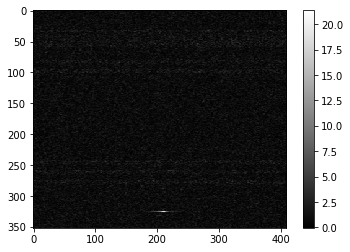

2 ==================================
2017-09-07T17:49:56


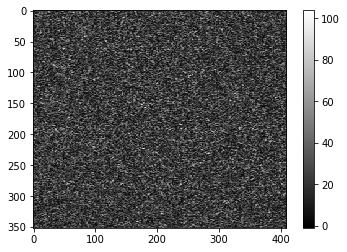

3 ==================================
2017-09-07T17:49:38


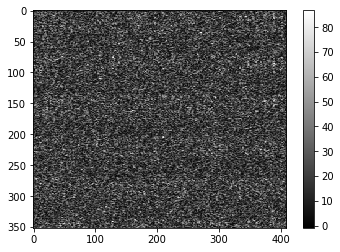

4 ==================================
2017-09-07T17:49:36


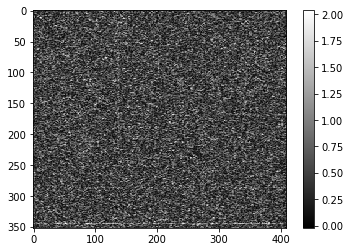

5 ==================================
2017-09-07T17:49:36


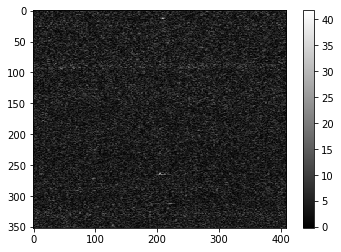

6 ==================================
2017-09-07T17:49:30


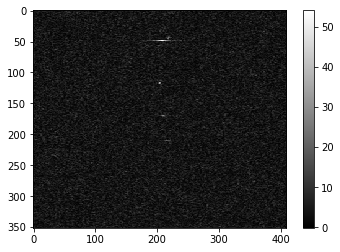

7 ==================================
2017-09-07T17:49:17


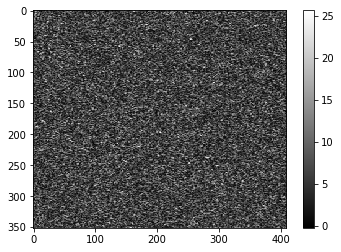

8 ==================================
2017-09-07T17:48:54


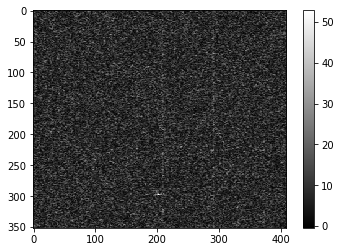

9 ==================================
2017-09-07T17:48:50


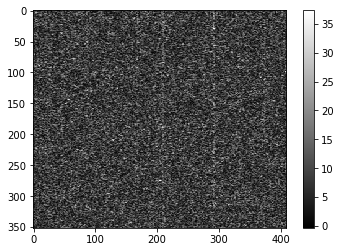

10 ==================================
2017-09-07T17:48:49


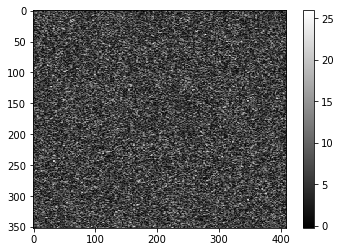

In [62]:
for i, snap in enumerate(snapshots[:10]):
    image_file = download_file(snap['url_file'], cache=True)
    image_data = fits.getdata(image_file, ext=1)
    plt.figure()
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    print(i+1, '==================================')
    print(snap['obstime'])
    plt.show()

# Get meteor data



In [63]:
bz = Bolidozor(debug = False)
station = bz.getStation(29)
bz.setStation(station)

meteors = bz.getMeteor(date_from=datetime.datetime(2017,9,7 ,17,40,0), date_to=datetime.datetime(2017,9,7 ,17,50,0)).result
print("Count of recieved snapshots is", len(snapshots))
print(json.dumps(meteors[0], sort_keys=True, indent=4))

Count of recieved snapshots is 161
{
    "duration": 0.512,
    "file_status": "online",
    "filename": "20170907174943117_DDMTREBIC-R3_met.fits",
    "filename_original": "20170907174943117_DDMTREBIC-R3_met.fits",
    "filename_raw": "20170907174735483_SVAKOV-R12_raws.fits",
    "filepath": "/storage/bolidozor/ddmtrebic/DDMTREBIC-R3/meteors/2017/09/07/17",
    "id": 22882040,
    "id_observer": 27,
    "id_server": 1,
    "mag": 15.2894,
    "noise": 5.1851,
    "obstime": "2017-09-07T17:49:43",
    "peak_f": 26526.9,
    "url_file": "http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/07/17/20170907174735483_SVAKOV-R12_met.fits",
    "url_file_js9": "http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/07/17/20170907174735483_SVAKOV-R12_met.fits",
    "url_file_raw": "http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/07/17/20170907174735483_SVAKOV-R12_raws.fits",
    "url_station": "http://api.vo.astro.cz/boli

1 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


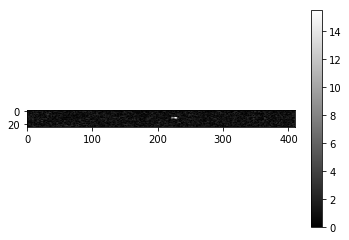

2 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


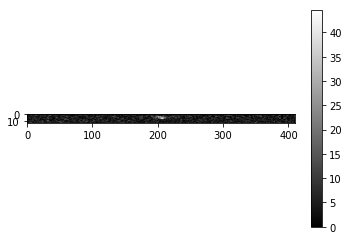

3 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


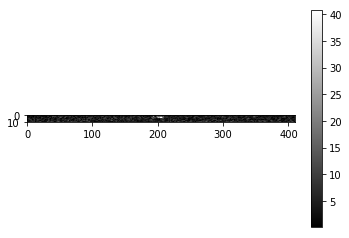

4 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


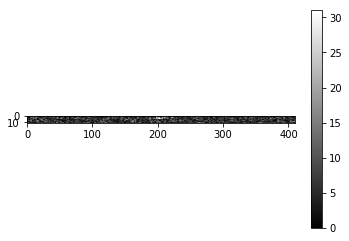

5 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


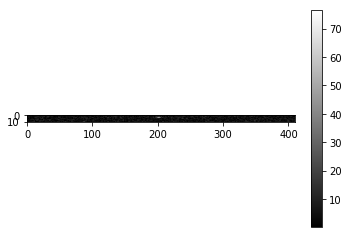

6 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


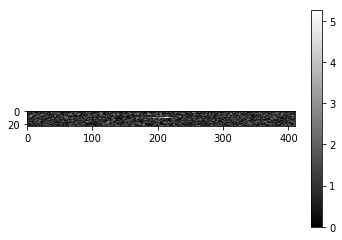

7 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


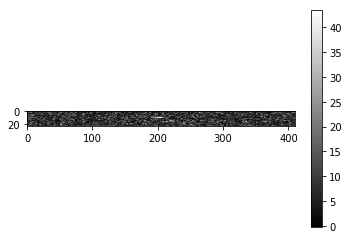

8 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


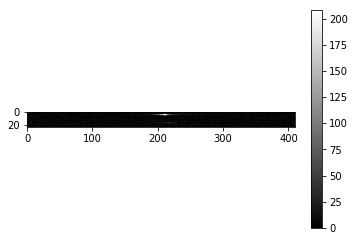

9 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


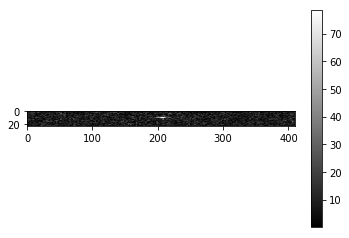

10 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


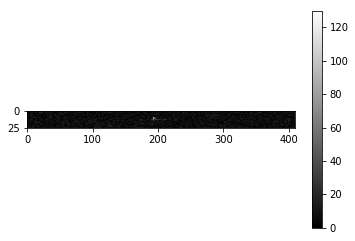

11 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


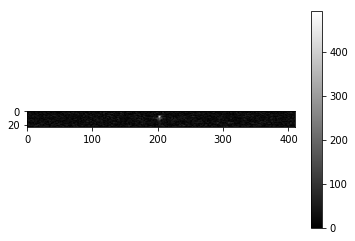

12 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


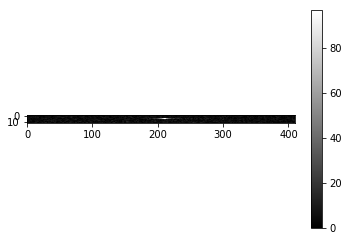

13 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


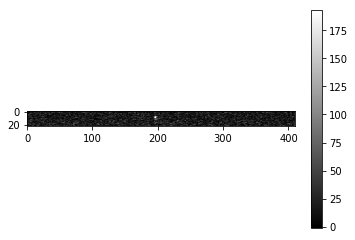

14 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


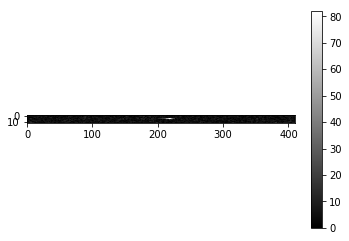

15 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


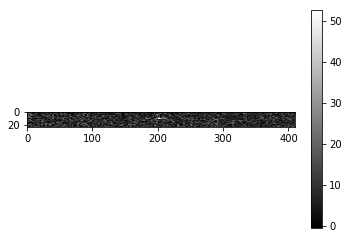

16 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


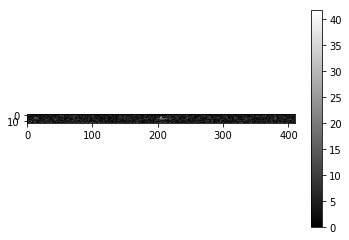

17 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


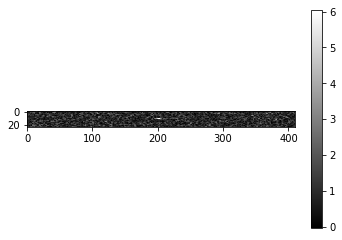

18 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


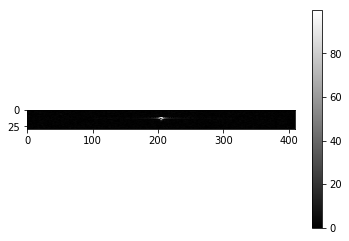

19 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


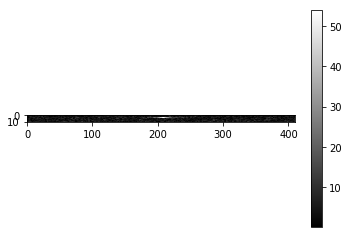

20 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


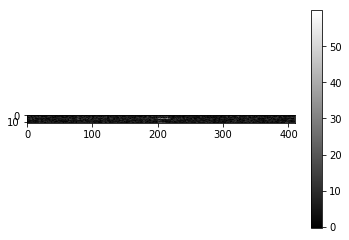

21 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


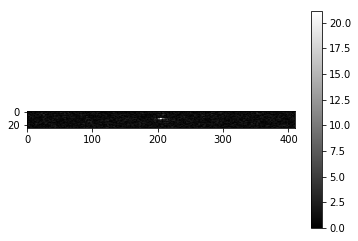

22 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


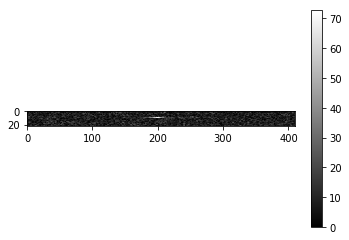

23 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


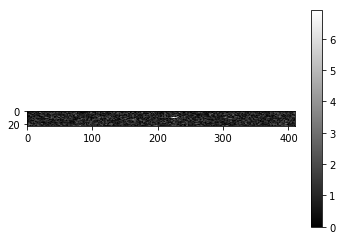

24 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


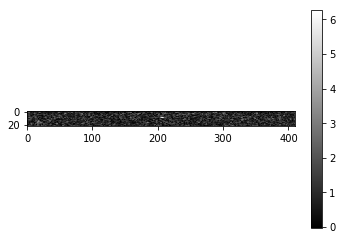

25 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


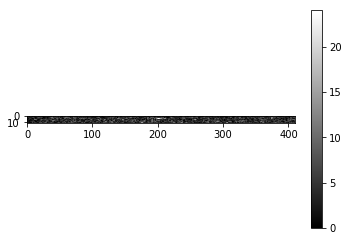

26 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


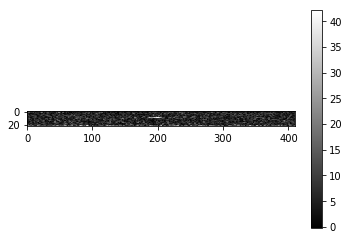

27 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


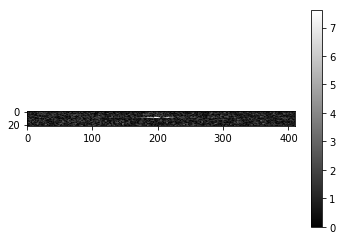

28 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


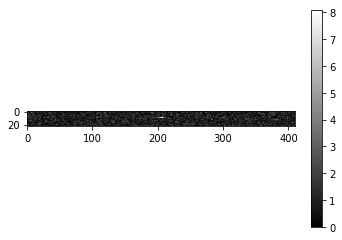

29 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


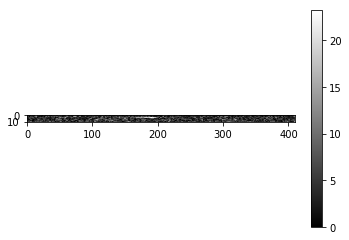

30 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


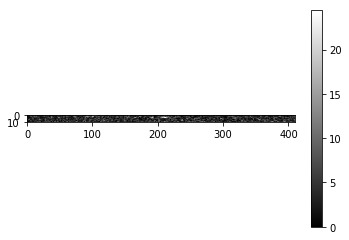

31 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


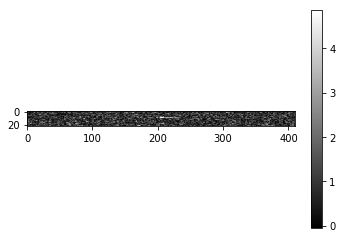

32 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


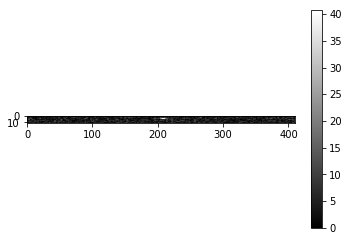

33 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


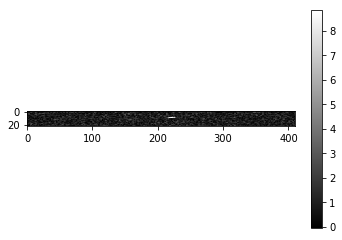

34 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


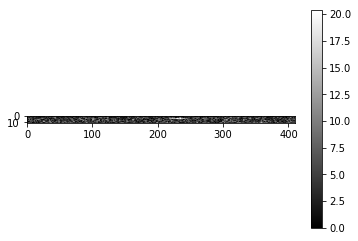

35 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


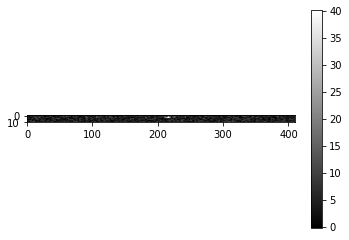

36 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


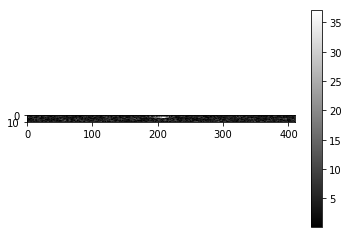

37 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


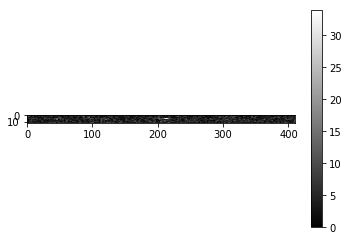

38 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


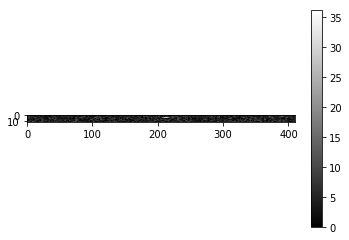

39 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


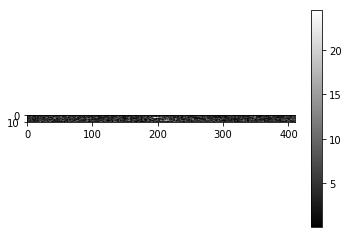

40 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


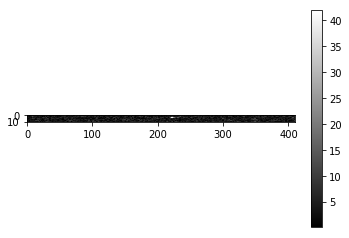

41 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


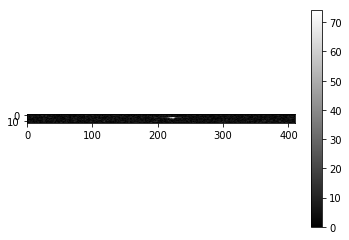

42 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


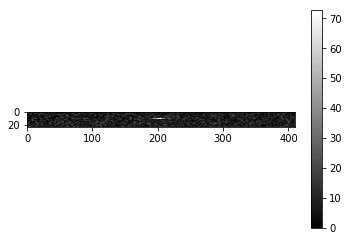

43 ==================================
2017-09-07T17:48:49 20170907174648828_VALMEZ-R1_snap.fits


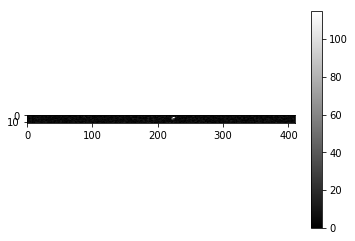

In [64]:
for i, meteor in enumerate(meteors[:100]):
    image_file = download_file(meteor['url_file'], cache=True)
    image_data = fits.getdata(image_file, ext=1)
    plt.figure()
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    print(i+1, '==================================')
    print(snap['obstime'], snap['filename'])
    display(HTML("<a href='%s' target='_blank'>%s</a> <a href='%s' target='_blank'>%s</a> <a href='%s' target='_blank'>%s</a>" %(snap['url_file_js9'], 'JS9', snap['url_file'], 'File', snap['url_file_js9'], 'Raw')))

    plt.show()